# box

Example boxplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import DATADIR, ErgastF1
from viz import Plot

In [3]:
f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

## How long does a pitstop take?

In [4]:
year = 2019
races = (
    f1.races
    .loc[lambda df: df['date'].dt.year.eq(year)]
)
stops = (
    f1.pit_stops
    .join(races['id_circuit'], how='inner', on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.drivers['driver'], on='id_driver')
    .set_index('circuit driver stop'.split())
    ['duration'].unstack('circuit')
)
stops

circuit                  Albert Park Grand Prix Circuit  \
driver             stop                                   
Alexander Albon    1                             21.780   
                   2                                NaN   
                   3                                NaN   
                   4                                NaN   
Antonio Giovinazzi 1                             27.172   
...                                                 ...   
Sergio Pérez       3                                NaN   
Valtteri Bottas    1                             22.014   
                   2                                NaN   
                   3                                NaN   
                   4                                NaN   

circuit                  Autodromo Nazionale di Monza  \
driver             stop                                 
Alexander Albon    1                           29.830   
                   2                              NaN   
                   3                              NaN   
                   4                              NaN   
Antonio Giovinazzi 1                           25.698   
...                                               ...   
Sergio Pérez       3                              NaN   
Valtteri Bottas    1                           23.700   
                   2                              NaN   
                   3                              NaN   
                   4                              NaN   

circuit                  Autódromo Hermanos Rodríguez  \
driver             stop                                 
Alexander Albon    1                           22.192   
                   2                           22.003   
                   3                              NaN   
                   4                              NaN   
Antonio Giovinazzi 1                           43.411   
...                                               ...   
Sergio Pérez       3                              NaN   
Valtteri Bottas    1                           22.179   
                   2                              NaN   
                   3                              NaN   
                   4                              NaN   

circuit                  Autódromo José Carlos Pace  \
driver             stop                               
Alexander Albon    1                         23.073   
                   2                         23.071   
                   3                            NaN   
                   4                            NaN   
Antonio Giovinazzi 1                         23.155   
...                                             ...   
Sergio Pérez       3                            NaN   
Valtteri Bottas    1                         23.148   
                   2                         23.210   
                   3                            NaN   
                   4                            NaN   

circuit                  Bahrain International Circuit  Baku City Circuit  \
driver             stop                                                     
Alexander Albon    1                            25.659             20.720   
                   2                            24.842                NaN   
                   3                               NaN                NaN   
                   4                               NaN                NaN   
Antonio Giovinazzi 1                            27.725             20.776   
...                                                ...                ...   
Sergio Pérez       3                               NaN                NaN   
Valtteri Bottas    1                            24.865             20.006   
                   2                            24.433                NaN   
                   3                               NaN                NaN   
                   4                               NaN                NaN   

circuit                  Circu

## don't blink

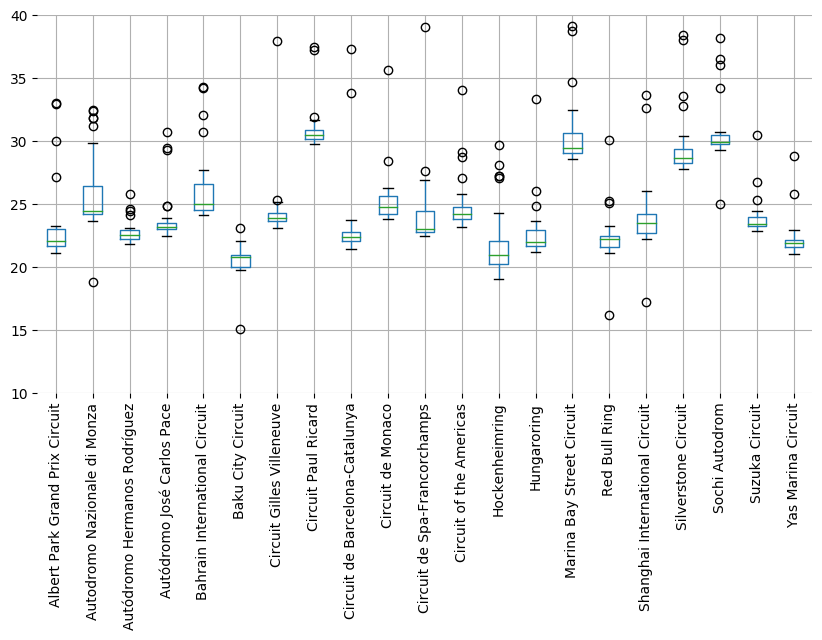

In [5]:
plot.box(stops, ylim=(10, 40))

## box box box

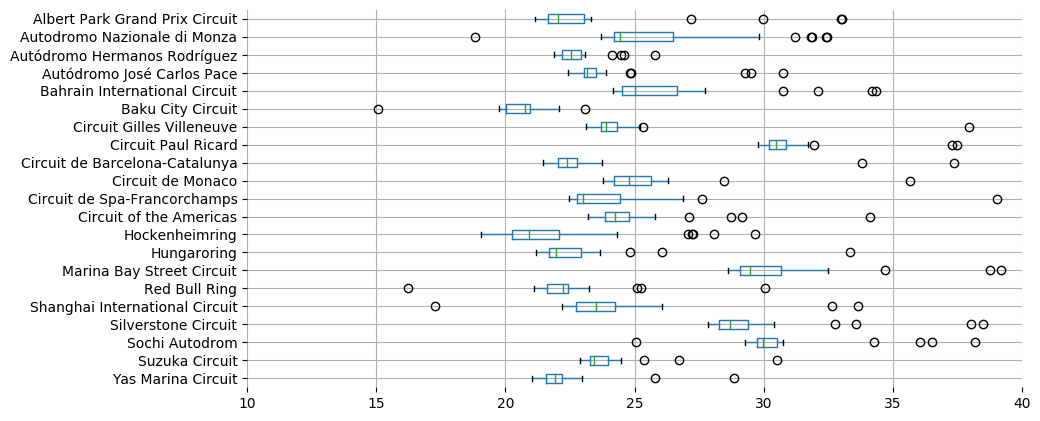

In [6]:
plot.boxh(stops, xlim=(10, 40))